In [178]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from collections import Counter

In [2]:
visa_data = pd.read_csv('data/h1b_kaggle[1].csv',index_col='Unnamed: 0')

C:\Users\Sarvani\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
visa_data.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [132]:
data_scientist=visa_data[visa_data.JOB_TITLE == 'DATA SCIENTIST']

In [133]:
data_scientist_Employer=data_scientist.EMPLOYER_NAME.value_counts().to_frame().head(50)

In [134]:
data_scientist_Employer=data_scientist_Employer.reset_index()

In [135]:
data_scientist_Employer.columns = ['EMPLOYER','H1B_COUNT']

Text(0.5,0,'Number of Petitions (x1000)')

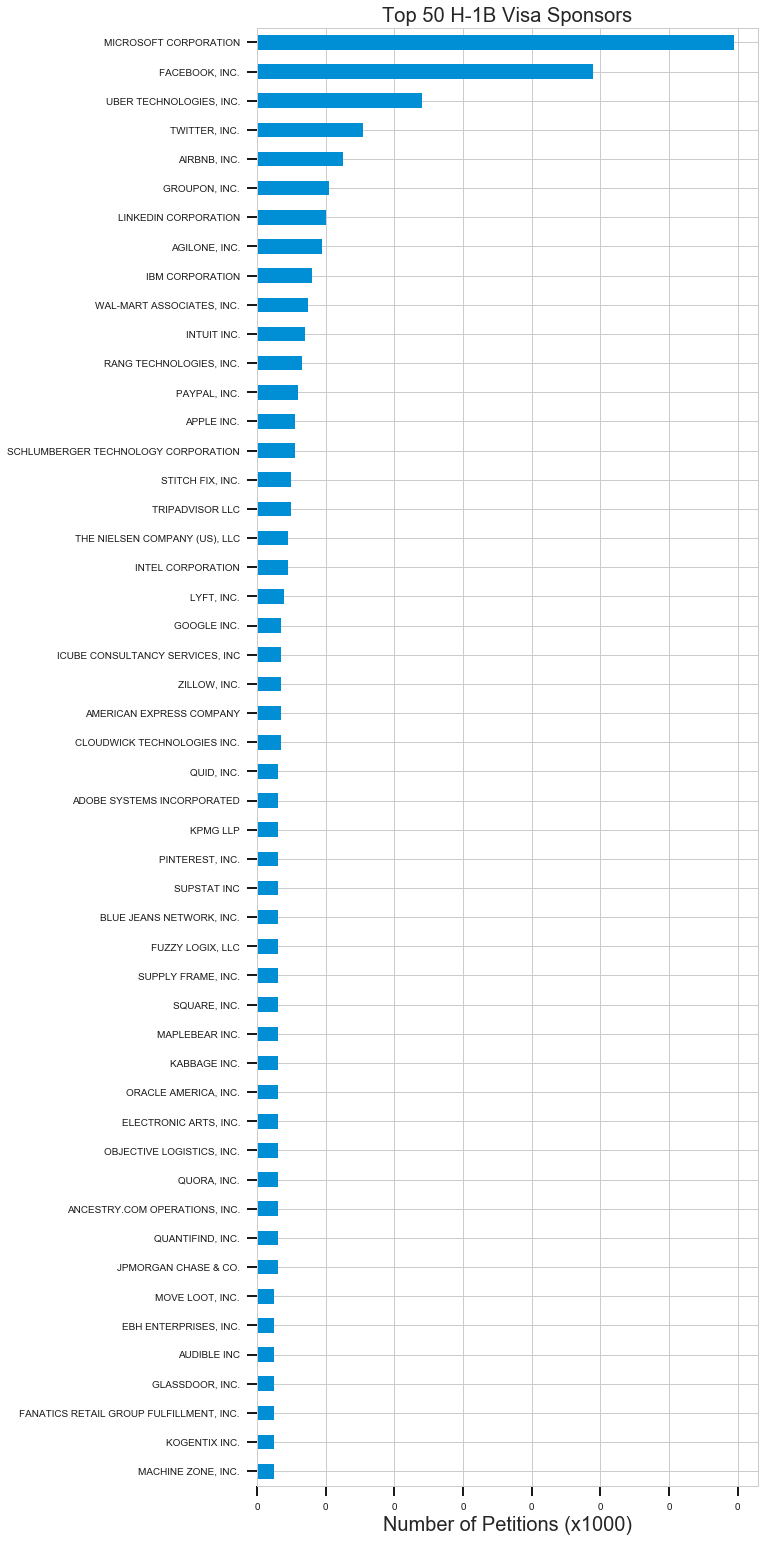

In [141]:
fig, ax = plt.subplots()# figsize=(8,4))
s = data_scientist_Employer.set_index('EMPLOYER')['H1B_COUNT']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 25), 
            title='Top 50 H-1B Visa Sponsors')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatter = FuncFormatter(thousand)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Number of Petitions (x1000)',size=20)

In [223]:
hardware_eng=visa_data[visa_data.JOB_TITLE == 'HARDWARE ENGINEER']

In [224]:
hardware_eng=hardware_eng.WORKSITE.str.split(',')

In [233]:
hardware_eng=hardware_eng.reset_index()

In [237]:
hardware_eng.shape[0]

2556

In [239]:
state = []
for i in range(hardware_eng.shape[0]):
    state.append(hardware_eng.WORKSITE[i][1])

In [250]:
hardware_eng['STATE'] = state

In [274]:
hardware_eng_state = hardware_eng.STATE.value_counts().to_frame().head(10)

In [275]:
hardware_eng_state = hardware_eng_state.reset_index()

In [276]:
hardware_eng_state.columns = ['STATE','NO_HARDWARE_JOBS']

Text(0.5,0,'Number of Petitions')

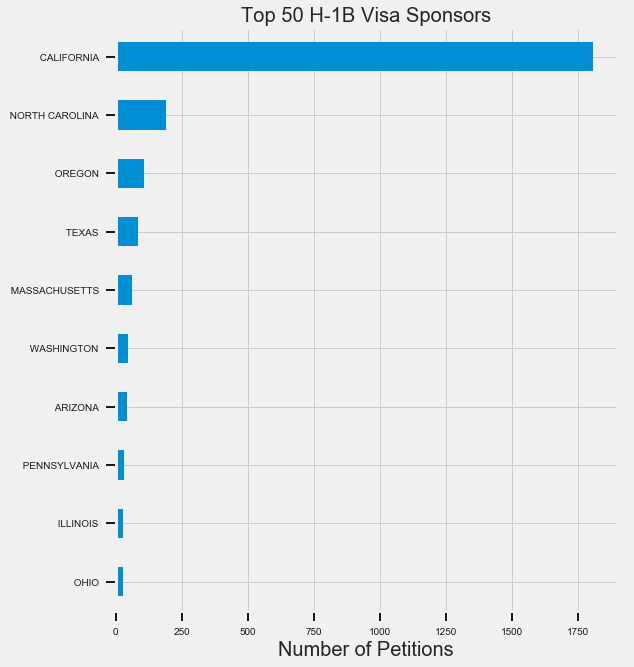

In [278]:
fig, ax = plt.subplots()# figsize=(8,4))
s = hardware_eng_state.set_index('STATE')['NO_HARDWARE_JOBS']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 10), 
            title='Top 50 H-1B Visa Sponsors')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
ax.set_xlabel('Number of Petitions',size=20)

In [39]:
data_engineer=visa_data[visa_data.JOB_TITLE == 'DATA ENGINEER']

In [47]:
data_engineer_growth=data_engineer.groupby('YEAR')['CASE_STATUS'].count()

In [55]:
data_engineer_growth

YEAR
2011.0     18
2012.0     32
2013.0     41
2014.0     89
2015.0    160
2016.0    251
Name: CASE_STATUS, dtype: int64

Text(0,0.5,'DAT ENGINEER APPLIED FOR H!B-VISA')

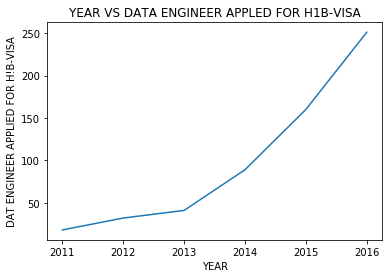

In [62]:
plt.plot(data_engineer_growth)
plt.title('YEAR VS DATA ENGINEER APPLED FOR H1B-VISA')
plt.xlabel('YEAR')
plt.ylabel('DAT ENGINEER APPLIED FOR H!B-VISA')

Text(0.5,0,'Number of Petitions (x1000)')

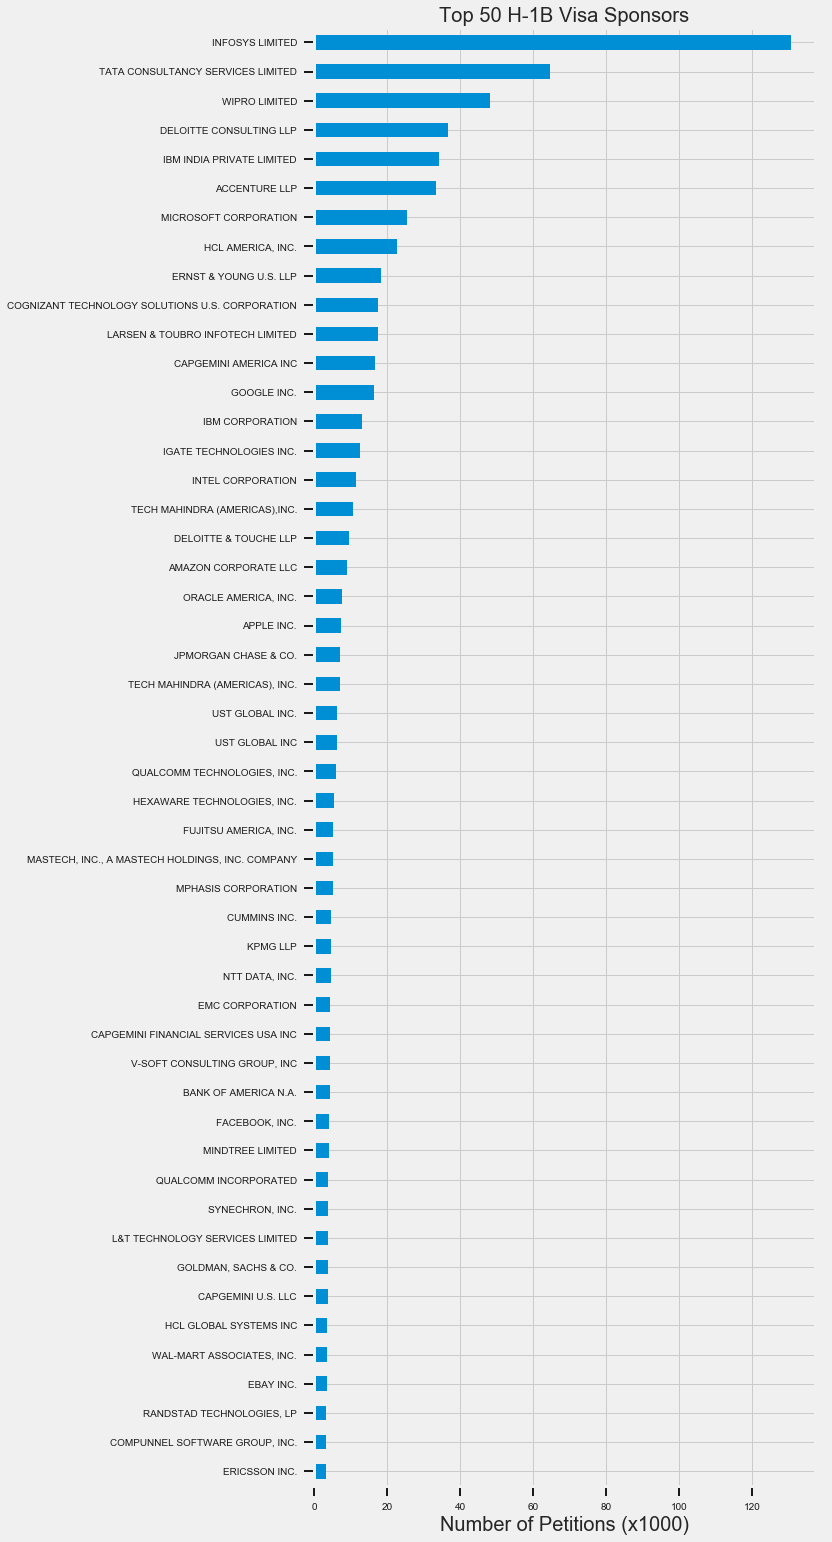

In [281]:
df_employer = visa_data['EMPLOYER_NAME'].value_counts().to_frame().head(50)
df_employer = df_employer.reset_index()
df_employer.columns = ['EMPLOYER_NAME','H1B_COUNT']
fig, ax = plt.subplots()# figsize=(8,4))
s = df_employer.set_index('EMPLOYER_NAME')['H1B_COUNT']
plt.style.use('fivethirtyeight')
ax = s.plot(kind='barh', figsize=(8, 25), 
            title='Top 50 H-1B Visa Sponsors')
ax.set_ylabel('', visible=False)
ax.tick_params(direction='out', length=10, width=2, colors='k')
ax.invert_yaxis()
def thousand(x, pos):
    return '%1.0f' % (x*1e-3)
formatter = FuncFormatter(thousand)
ax.xaxis.set_major_formatter(formatter)
ax.set_xlabel('Number of Petitions (x1000)',size=20)